In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter

In [9]:
fname1='../../SMC/Type4/OGLEJ003618.15-734247.4/ADP.2016-09-20T07:08:37.791.fits'
fname2='../../SMC/Type4/OGLEJ003715.60-734546.0/ADP.2016-09-21T06:49:35.170.fits'
fname3='../../SMC/Type4/OGLEJ003836.25-734813.4/ADP.2016-09-21T07:05:31.256.fits'
mu_cent='../../SMC/Mu_Centauri/ADP.2016-09-21T11:56:32.916.fits'

In [10]:
fits.getheader(fname2)

SIMPLE  =                    T / Written by IDL:  Mon Sep 19 22:23:20 2016      
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T / File contains extensions                       
DATASUM = '         0'         / data unit checksum updated 2016-09-19T22:23:20 
ORIGIN  = 'ESO-LASILLA'        / Origin                                         
FILENAME= 'f14101.bdf'         / Original file base-name                        
OBJECT  = 'hv1334  '           / Object                                         
RA      =             9.017431 / [deg] Right ascension                          
DEC     =            -73.77809 / [deg] Declination                              
EQUINOX =               2000.0 / Equinox                                        
DATE-OBS= '2004-12-24T02:16:55.408' / Start of observation                      
MJD-OBS =       53363.095085

In [11]:
fits.info(fname1)

Filename: ../../SMC/Type4/OGLEJ003618.15-734247.4/ADP.2016-09-20T07:08:37.791.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     457   ()      
  1  SPECTRUM      1 BinTableHDU     45   1R x 3C   [189640D, 189640E, 189640E]   


In [12]:
#plt.figure(figsize=(20,20))
#plt.imshow(fits.getdata(fname3).T[600:800],norm='log',vmin=200,aspect=10)
xd1 = fits.getdata(fname1)
xd2 = fits.getdata(fname2)
xd3 = fits.getdata(fname3)
cent=fits.getdata(mu_cent)
xd2,cent

(FITS_rec([([3527.39999863, 3527.45999863, 3527.51999862, ..., 9216.41987147, 9216.47987147, 9216.53987146], [ 0.00000000e+00,  6.81812704e-01,  7.47388303e-01, ..., -2.53756507e-03,  0.00000000e+00,  0.00000000e+00], [nan, nan, nan, ..., nan, nan, nan])],
          dtype=(numpy.record, [('WAVE', '>f8', (94820,)), ('FLUX', '>f4', (94820,)), ('ERR', '>f4', (94820,))])),
 FITS_rec([([3527.36999997, 3527.39999997, 3527.42999997, ..., 9216.26987281, 9216.29987281, 9216.32987281], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  1.95430803e+00,  1.91651344e+00,  0.00000000e+00], [nan, nan, nan, ..., nan, nan, nan])],
          dtype=(numpy.record, [('WAVE', '>f8', (189633,)), ('FLUX', '>f4', (189633,)), ('ERR', '>f4', (189633,))])))

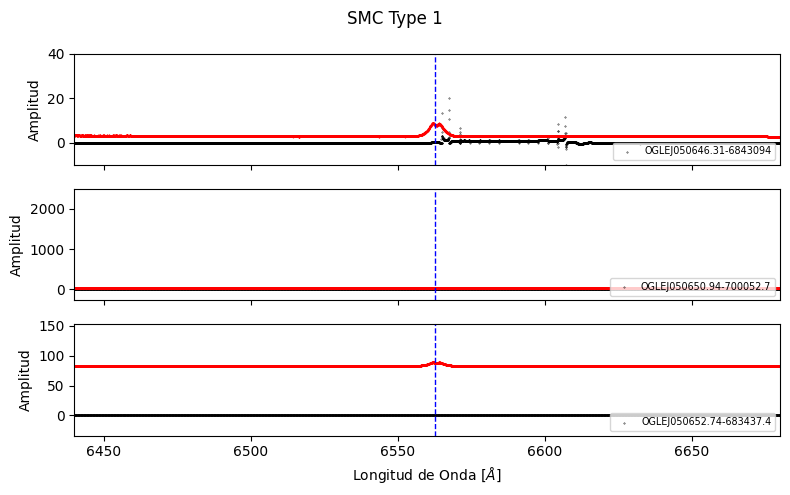

In [19]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 5))  # 5 rows, 1 column

# Plot each light curve
axs[0].scatter(xd1['WAVE'][0]-4.5,xd1['FLUX'][0], s=0.1, color='black',label='OGLEJ050646.31-6843094')
axs[0].scatter(cent['WAVE'][0],cent['FLUX'][0],s=0.1, color='red')
axs[1].scatter(xd2['WAVE'][0]-4.5,xd2['FLUX'][0], s=0.1, color='black',label='OGLEJ050650.94-700052.7')
axs[1].scatter(cent['WAVE'][0],cent['FLUX'][0]+16,s=0.1, color='red')
axs[2].scatter(xd3['WAVE'][0]-4.5,xd3['FLUX'][0], s=0.1, color='black',label='OGLEJ050652.74-683437.4')
axs[2].scatter(cent['WAVE'][0],cent['FLUX'][0]+80,s=0.1, color='red')



# Labels
for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.axvline(x=6562.8, color='blue', linestyle='--', linewidth=1)
    ax.legend(loc='lower right', fontsize='x-small')
axs[-1].set_xlabel(r'Longitud de Onda [$\AA$]')
axs[-1].set_xlim(6440, 6680)
axs[0].set_ylim(-10, 40)
#axs[1].set_ylim(0, 30)
#axs[2].set_ylim(-10, 150)

fig.suptitle('SMC Type 1')
plt.tight_layout()
plt.show()